**데이콘 "집값 예측 경진대회"에서 데이터를 활용하여 집값을 예측했습니다. **

1. train.csv : 학습 데이터
id : 데이터 고유 id
OverallQual : 전반적 재료와 마감 품질
YearBuilt : 완공 연도
YearRemodAdd : 리모델링 연도
ExterQual : 외관 재료 품질
BsmtQual : 지하실 높이
TotalBsmtSF : 지하실 면적 
1stFlrSF : 1층 면적 
GrLivArea : 지상층 생활 면적
FullBath : 지상층 화장실 개수 
KitchenQual : 부억 품질 
GarageYrBlt : 차고 완공 연도
GarageCars: 차고 자리 개수
GarageArea: 차고 면적 
target : 집값(달러 단위)


2.test.csv
id : 데이터 고유 id
OverallQual : 전반적 재료와 마감 품질
YearBuilt : 완공 연도
YearRemodAdd : 리모델링 연도
ExterQual : 외관 재료 품질
BsmtQual : 지하실 높이
TotalBsmtSF : 지하실 면적 
1stFlrSF : 1층 면적 
GrLivArea : 지상층 생활 면적
FullBath : 지상층 화장실 개수 
KitchenQual : 부억 품질 
GarageYrBlt : 차고 완공 연도
GarageCars: 차고 자리 개수
GarageArea: 차고 면적 


3.sample_submission.csv 
id : 데이터 고유 id
target : 집값(달러 단위)


# 데이터 획득 및 환경 조성

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import pandas as pd 

df1 = "https://raw.githubusercontent.com/annsyj94/Data_Science_Contest-/main/house_price/train.csv"
df2 = "https://raw.githubusercontent.com/annsyj94/Data_Science_Contest-/main/house_price/test.csv"
df3 = "https://raw.githubusercontent.com/annsyj94/Data_Science_Contest-/main/house_price/sample_submission.csv"

train = pd.read_csv(df1)
test = pd.read_csv(df2)
sample_sub = pd.read_csv(df3)

In [ ]:
print(train.shape)
print("--------------")
print(test.shape)

(1350, 15)
--------------
(1350, 14)


In [ ]:
train.head(5)

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


# 데이터 탐색 및 EDA

In [ ]:
train['target'].describe()

count      1350.000000
mean     186406.312593
std       78435.424758
min       12789.000000
25%      135000.000000
50%      165375.000000
75%      217875.000000
max      745000.000000
Name: target, dtype: float64

Skew is: 1.7175856695235343


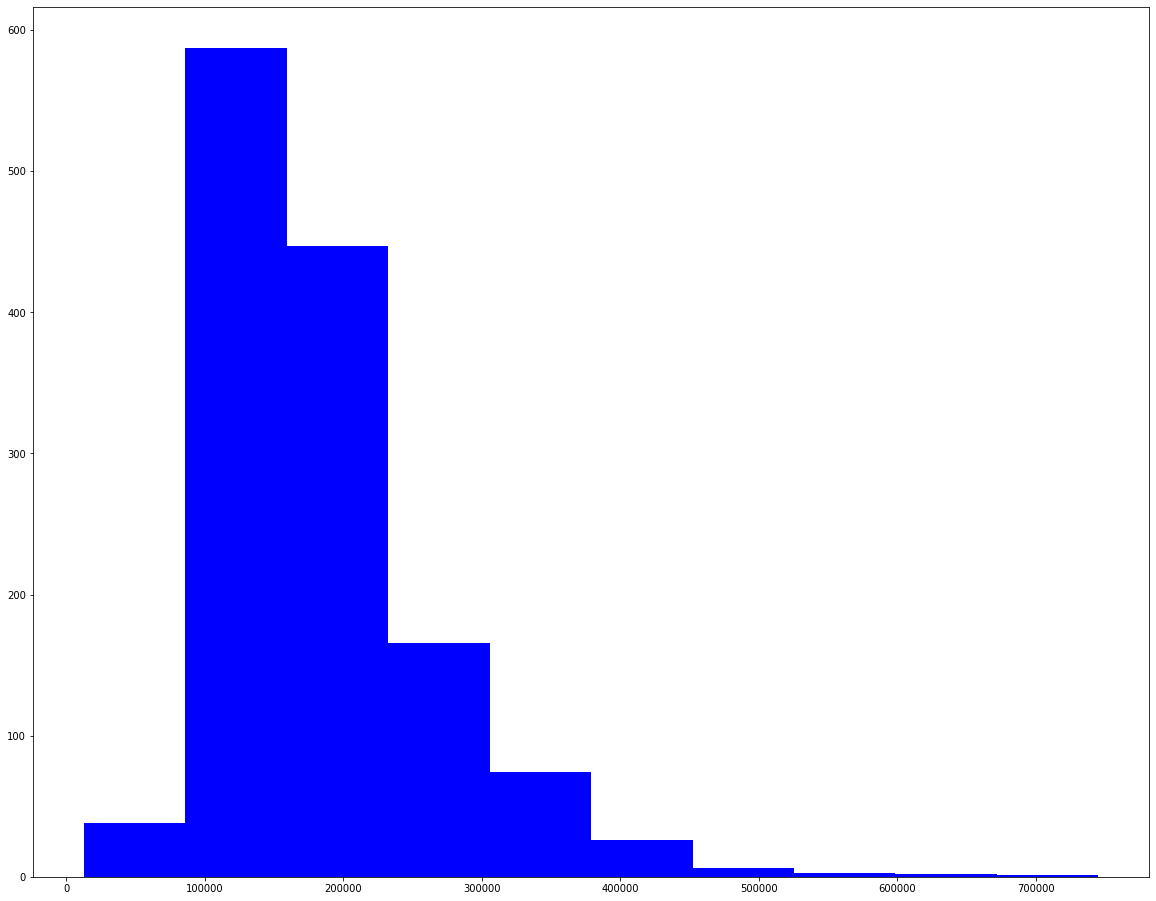

In [ ]:
print("Skew is:",train['target'].skew())
plt.hist(train['target'],color = 'blue')
plt.show()

Skew is: 0.08070163740417918


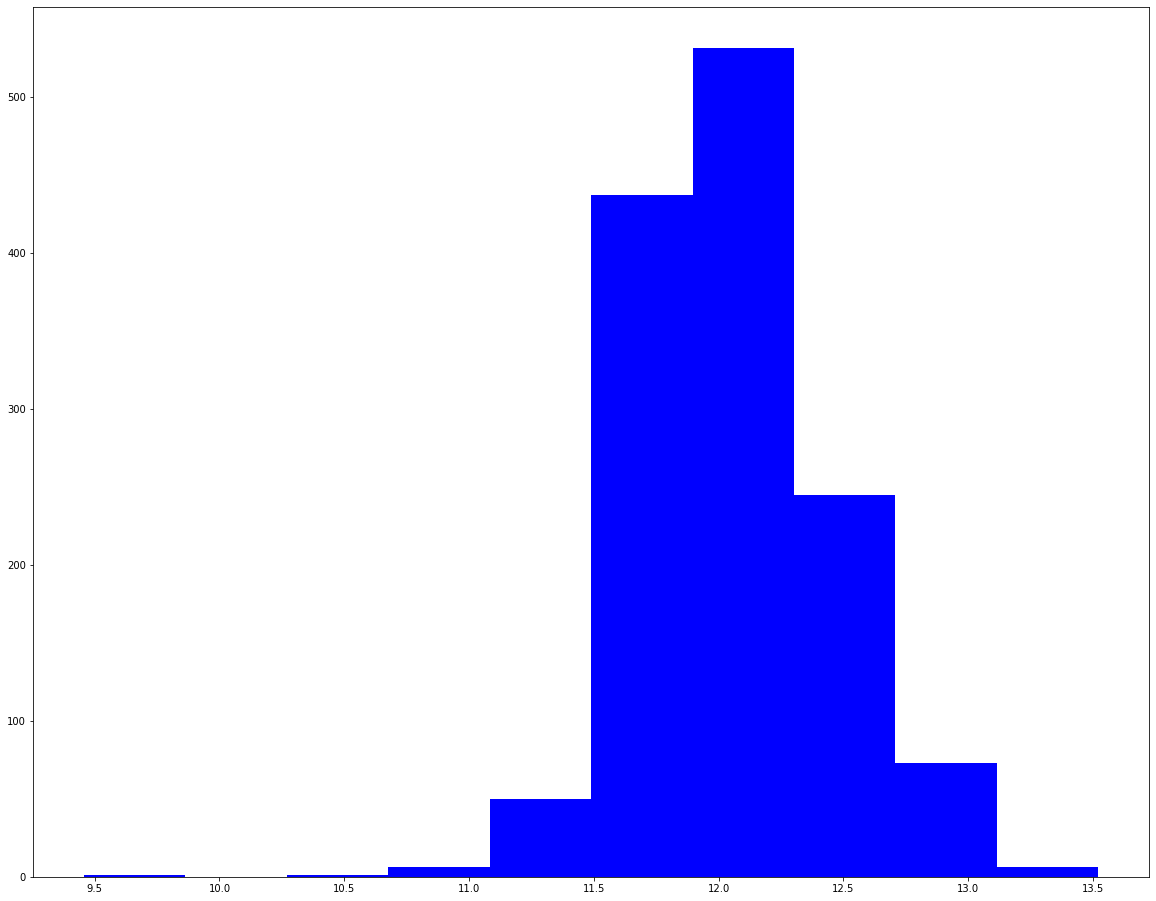

In [ ]:
target = np.log (train['target'])
print("Skew is:", target.skew())
plt.hist(target, color = 'blue')
plt.show()

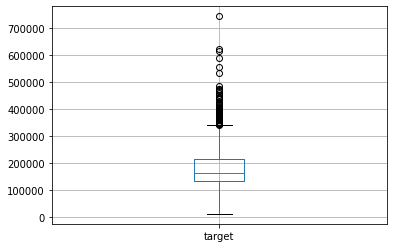

In [ ]:
train.boxplot(column=['target'])

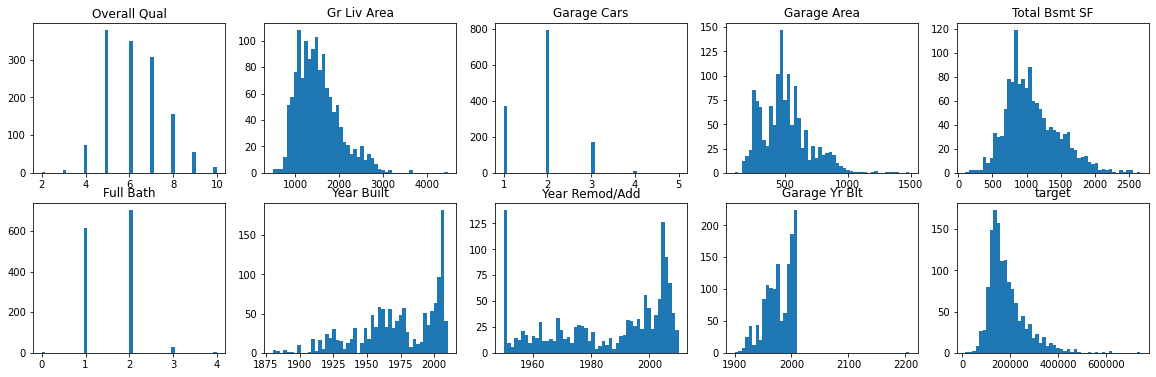

In [ ]:
train_feature = train[['Overall Qual','Gr Liv Area','Garage Cars','Garage Area','Total Bsmt SF','Full Bath','Year Built','Year Remod/Add','Garage Yr Blt','target']]

def plot_hist_each_column(df):
  plt.rcParams['figure.figsize'] = [20,16]
  fig = plt.figure(1)

  for i in range (len(df.columns)):
    ax = fig.add_subplot(5,5,i+1)
    plt.hist(df[df.columns[i]],bins=50)
    ax.set_title(df.columns[i])
  plt.show()

plot_hist_each_column(train_feature)

In [ ]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

id                int64
Overall Qual      int64
Gr Liv Area       int64
Garage Cars       int64
Garage Area       int64
Total Bsmt SF     int64
1st Flr SF        int64
Full Bath         int64
Year Built        int64
Year Remod/Add    int64
Garage Yr Blt     int64
target            int64
dtype: object

In [ ]:
corr = numeric_features.corr()
print (corr['target'].sort_values(ascending=False)[:5], '\n')
print (corr['target'].sort_values(ascending=False)[-5:])

target           1.000000
Overall Qual     0.810607
Gr Liv Area      0.742061
Total Bsmt SF    0.664047
1st Flr SF       0.646843
Name: target, dtype: float64 

Full Bath         0.554453
Year Built        0.546037
Year Remod/Add    0.529477
Garage Yr Blt     0.517973
id                0.022934
Name: target, dtype: float64


In [ ]:
train['Overall Qual'].unique()

array([10,  7,  5,  8,  6,  3,  4,  9,  2])

In [ ]:
quality_pivot = train.pivot_table(index='Overall Qual',
                  values='target', aggfunc=np.median)

quality_pivot

,target
Overall Qual,
2,35311
3,93000
4,108500
5,135000
6,159000
7,202500
8,275000
9,352500
10,426000


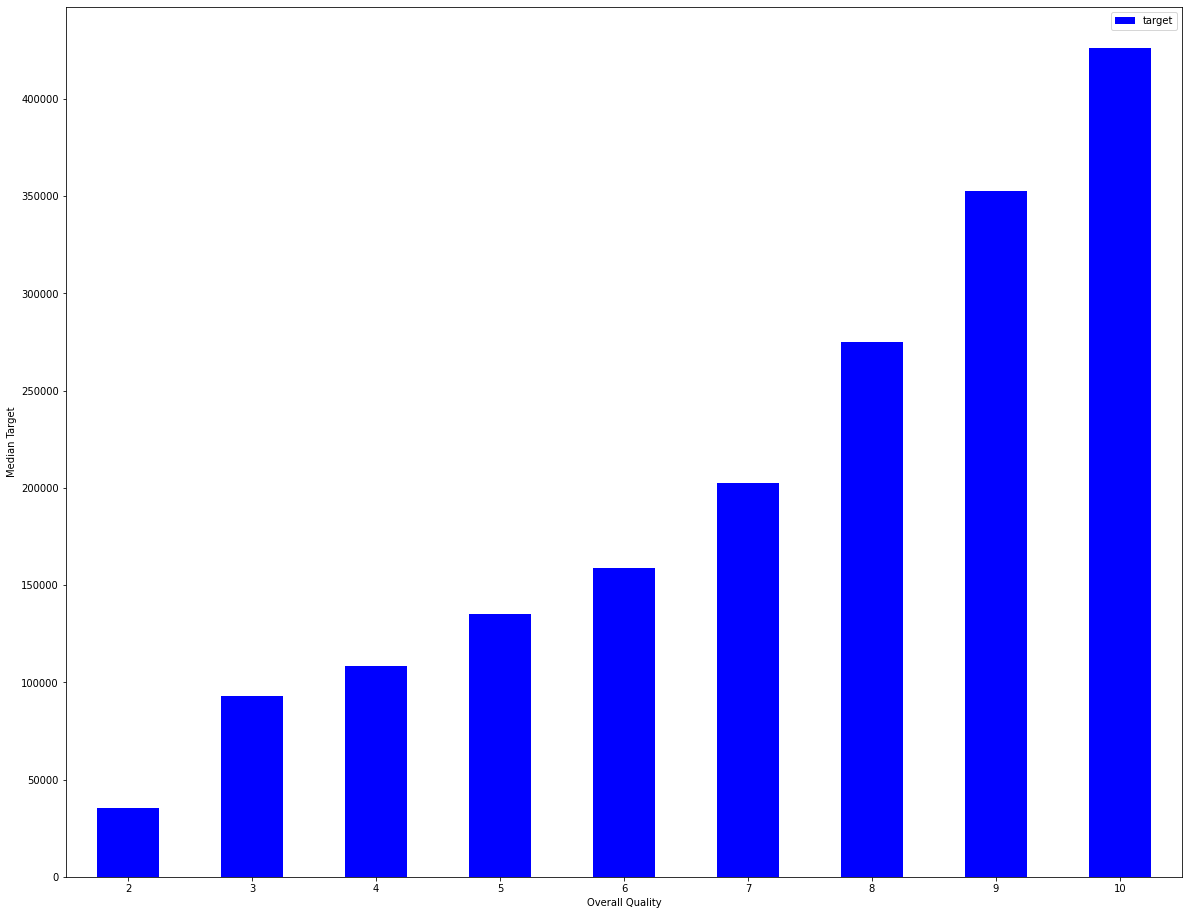

In [ ]:
quality_pivot.plot(color='blue',kind='bar')
plt.xlabel('Overall Quality')
plt.ylabel('Median Target')
plt.xticks(rotation=0)
plt.show()

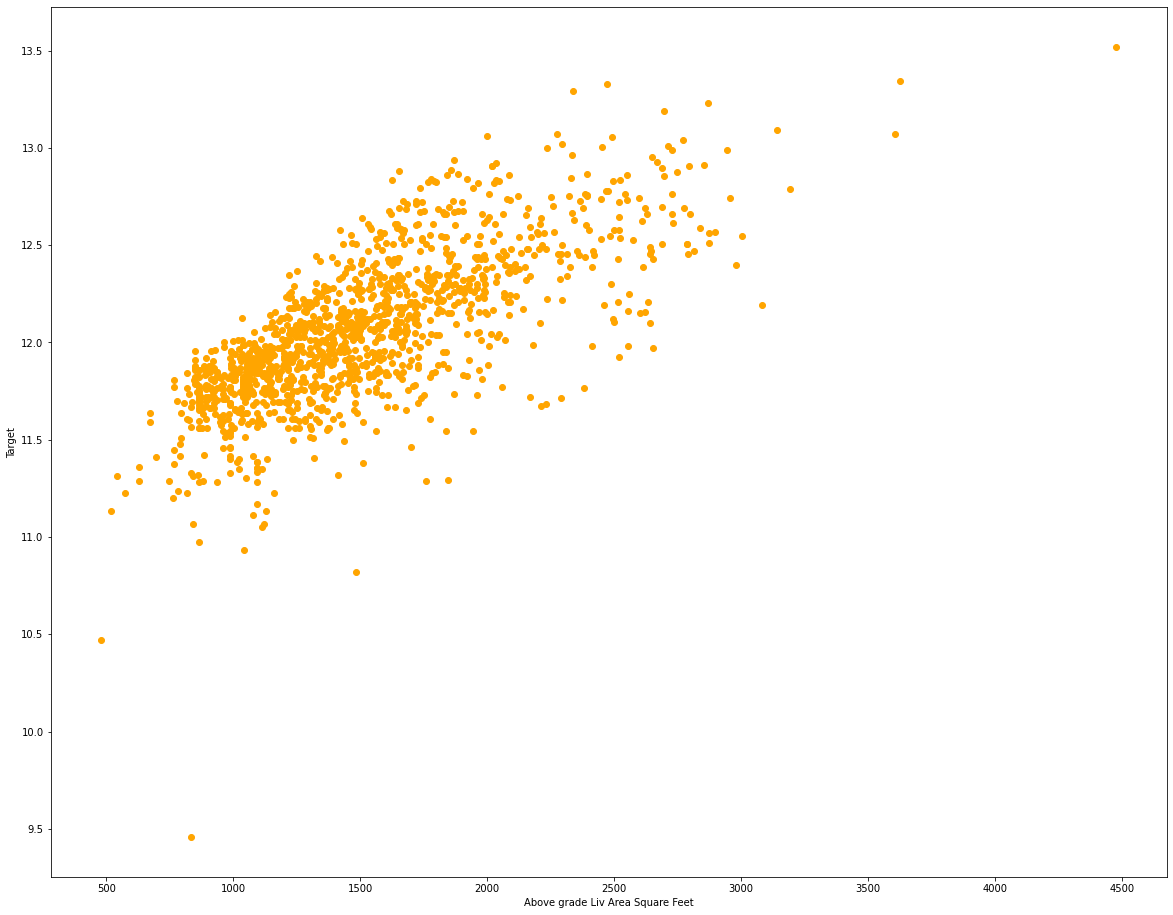

In [ ]:
plt.scatter(x=train['Gr Liv Area'],y=target, color = "orange")
plt.ylabel('Target')
plt.xlabel('Above grade Liv Area Square Feet')
plt.show()

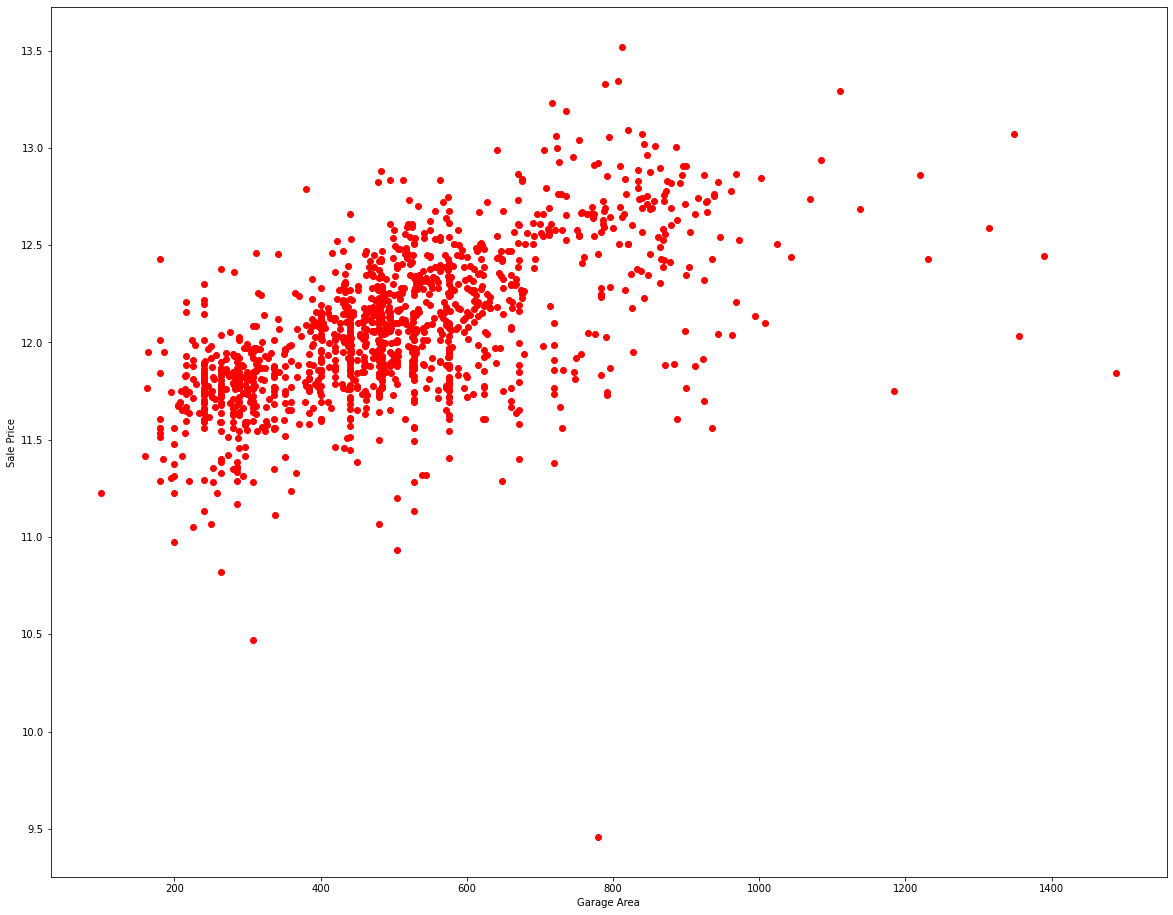

In [ ]:
plt.scatter(x=train['Garage Area'], y=target , color = "red")
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

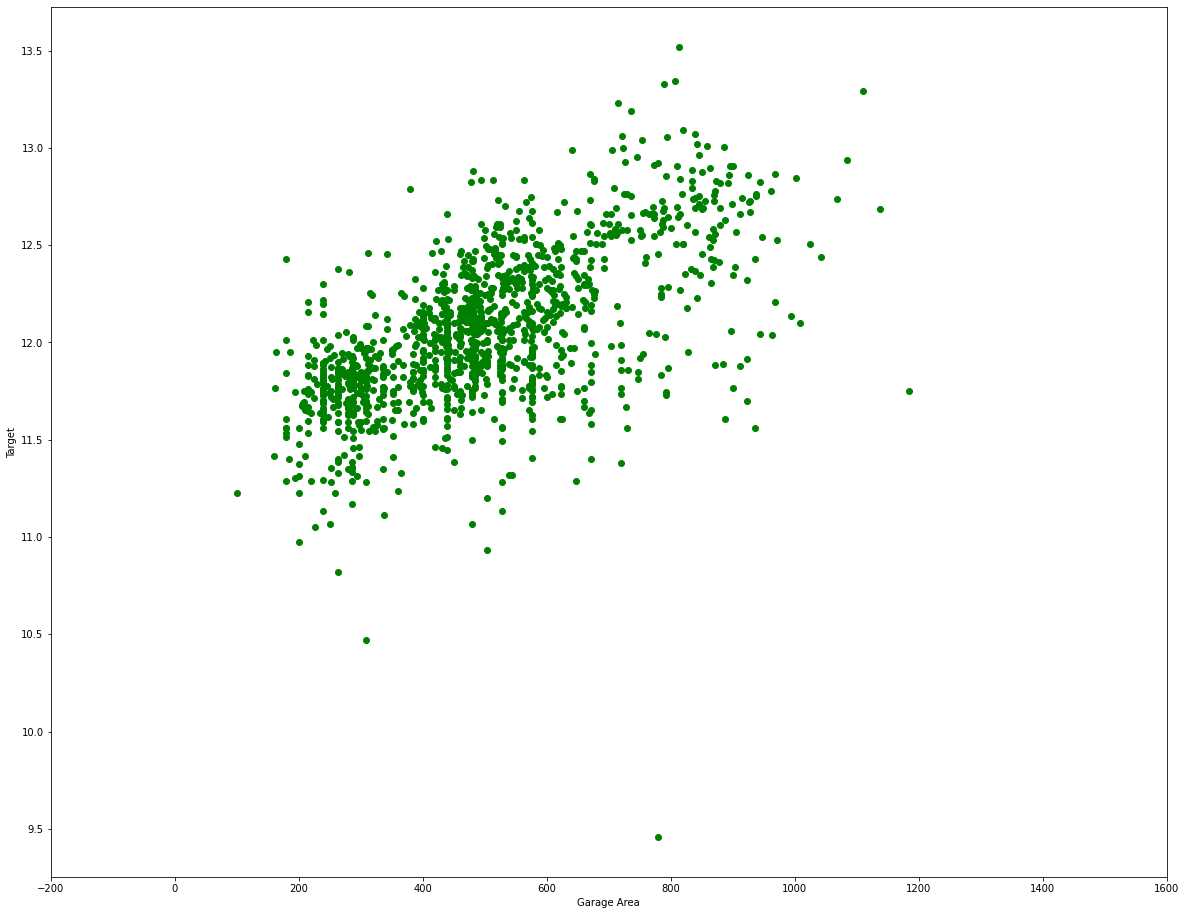

In [ ]:
train = train[train['Garage Area'] < 1200]

plt.scatter(x=train['Garage Area'], y=np.log(train['target']),color="green")
plt.xlim(-200,1600) # This forces the same scale as before
plt.ylabel('Target')
plt.xlabel('Garage Area')
plt.show()

# 기능 변환

In [ ]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,Exter Qual,Kitchen Qual,Bsmt Qual
count,1343,1343,1343
unique,4,4,5
top,TA,TA,TA
freq,806,658,603


In [ ]:
print ("Original: \n")
print (train['Exter Qual'].value_counts(), "\n")
print (train['Kitchen Qual'].value_counts(), "\n")
print (train['Bsmt Qual'].value_counts(), "\n")

Original: 

TA    806
Gd    482
Ex     47
Fa      8
Name: Exter Qual, dtype: int64 

TA    658
Gd    558
Ex    104
Fa     23
Name: Kitchen Qual, dtype: int64 

TA    603
Gd    579
Ex    132
Fa     28
Po      1
Name: Bsmt Qual, dtype: int64 



In [ ]:
train.replace(['Ex'],5,inplace=True)
train.replace(['Gd'],4,inplace=True)
train.replace(['TA'],3,inplace=True)
train.replace(['Fa'],2,inplace=True)
train.replace(['Po'],1,inplace=True)

train.head(3)

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,5,3,968,5,2392,2392,5,2,2003,2003,2003,386250
1,2,7,1352,4,2,466,4,1352,1352,5,2,2006,2007,2006,194000
2,3,5,900,3,1,288,3,864,900,3,1,1967,1967,1967,123000


In [ ]:
test.replace(['Ex'],5,inplace=True)
test.replace(['Gd'],4,inplace=True)
test.replace(['TA'],3,inplace=True)
test.replace(['Fa'],2,inplace=True)
test.replace(['Po'],1,inplace=True)

test.head(3)

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
0,1,9,1800,4,2,702,5,1800,1800,5,2,2007,2007,2007
1,2,6,1082,3,1,240,3,1082,1082,3,1,1948,1950,1948
2,3,6,1573,4,2,440,4,756,769,4,2,2000,2000,2000


In [ ]:
y = np.log(train['target'])
x = train.drop(['target', 'id'], axis=1)

# 선형 모델 구축

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(899, 13)
(899,)
(444, 13)
(444,)


In [ ]:
from sklearn import linear_model

lr = linear_model.LinearRegression()

model = lr.fit(x_train, y_train)
print ("R^2 is: \n", model.score(x_test, y_test))

R^2 is: 
 0.8306253805751973


In [ ]:
predictions = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.02442788283178305


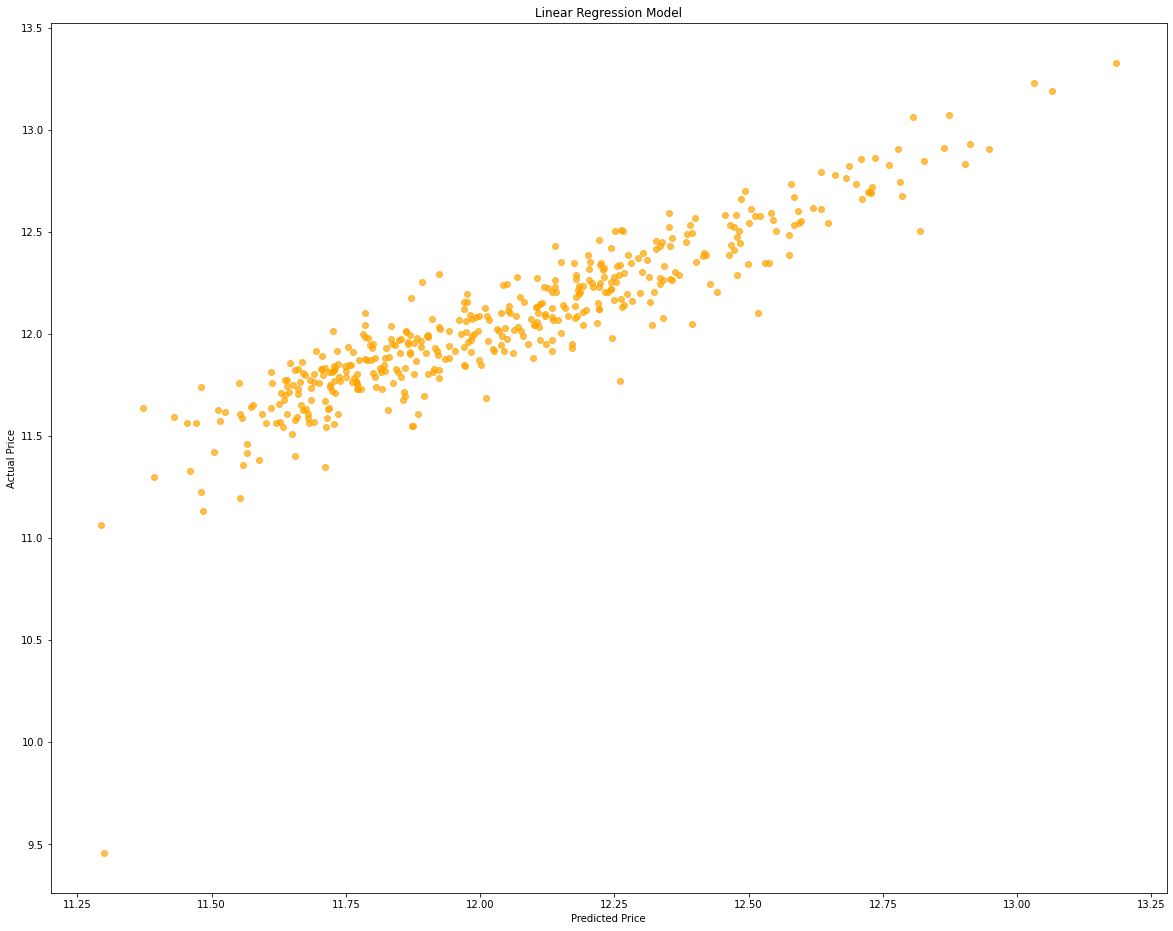

In [ ]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7, color='orange') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

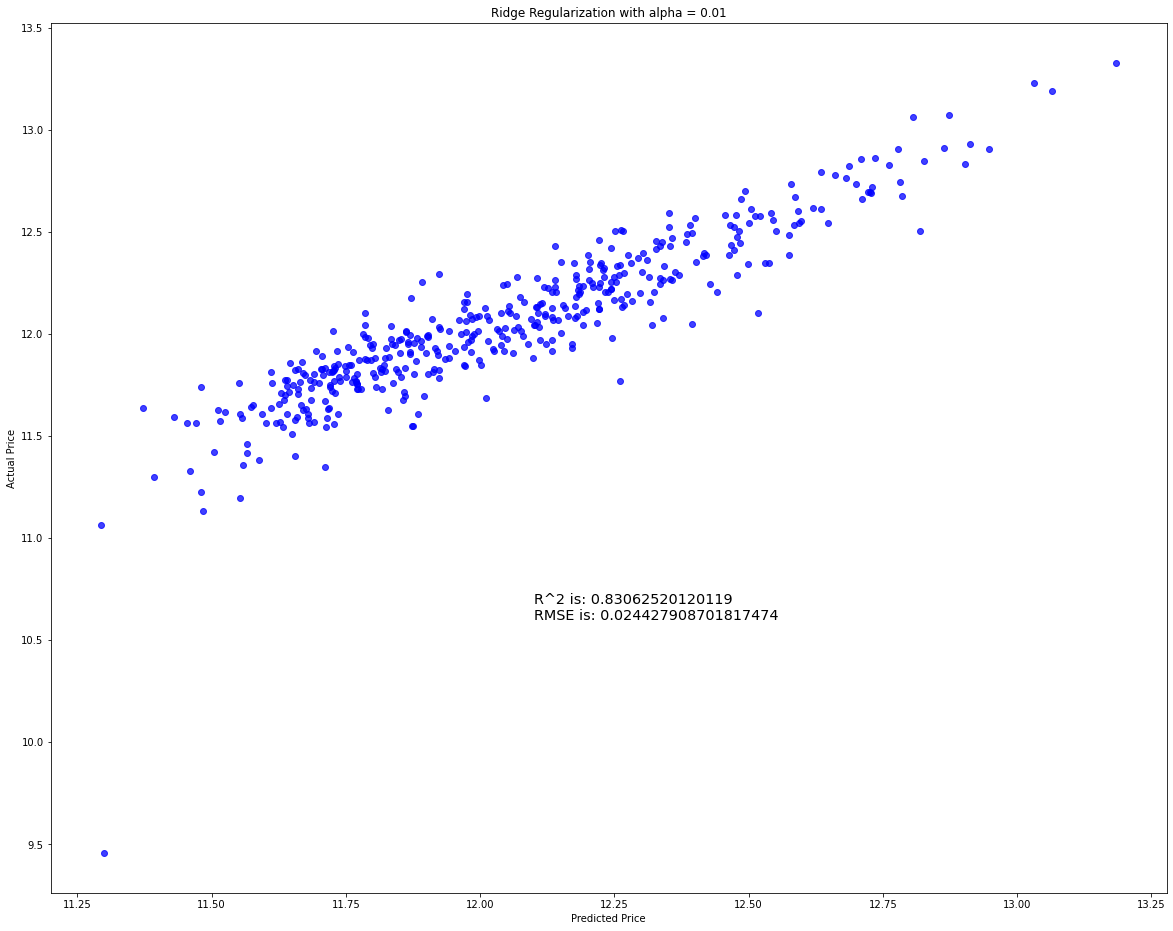

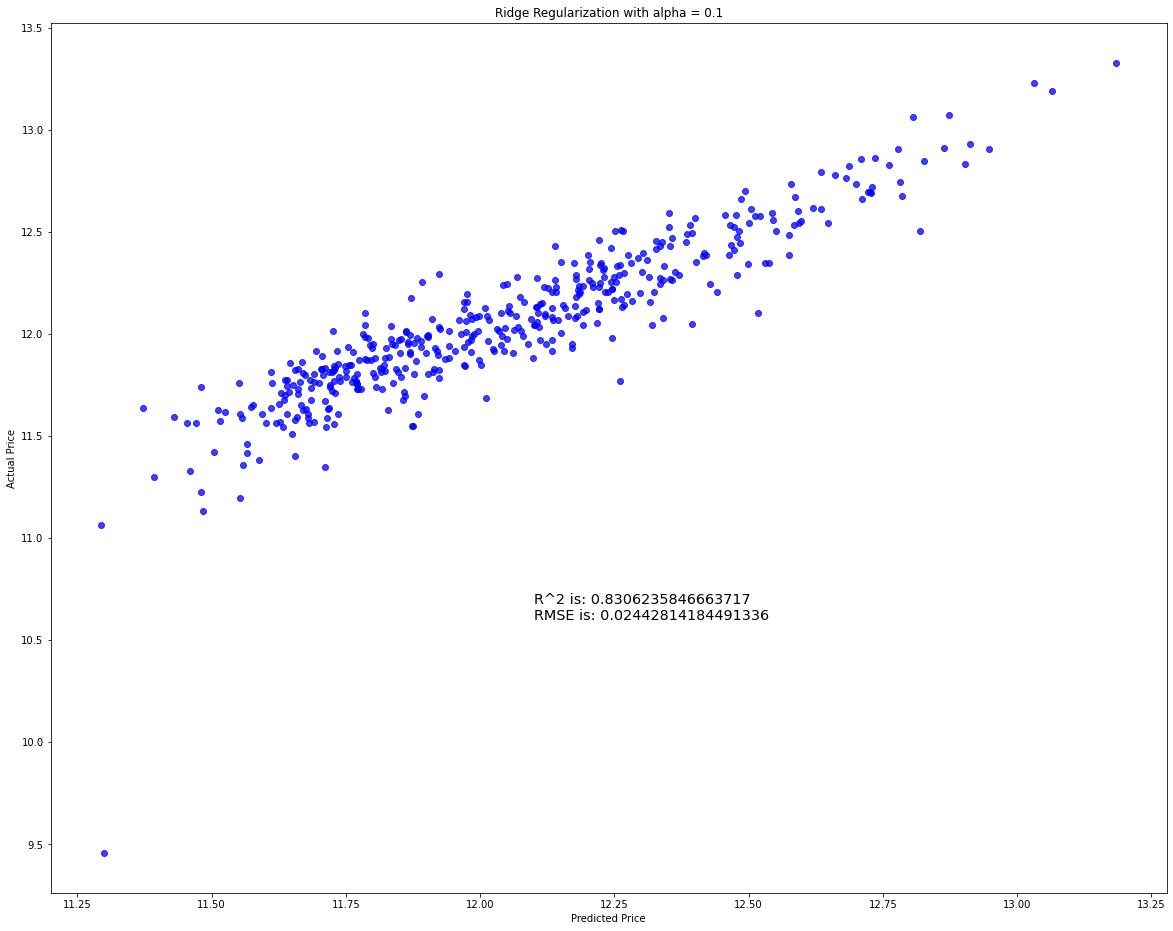

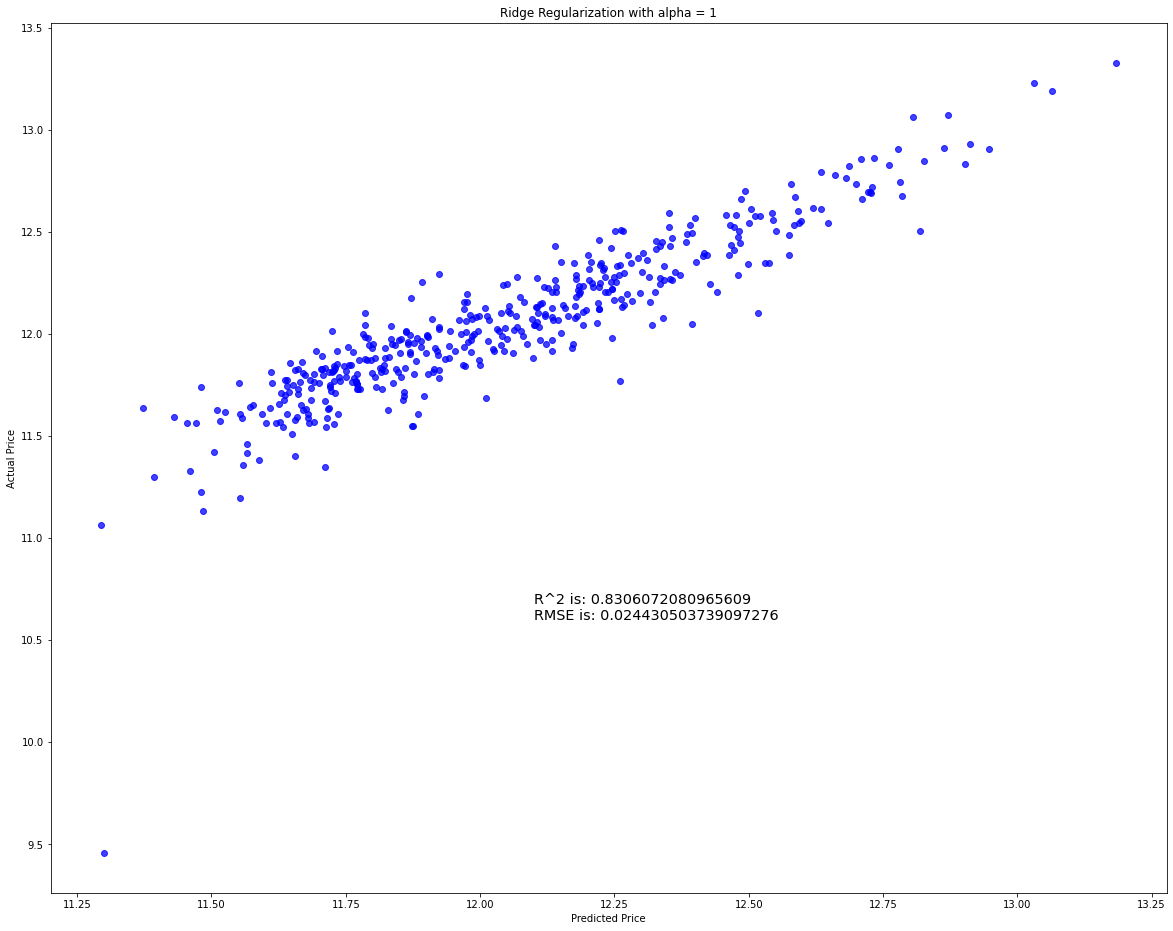

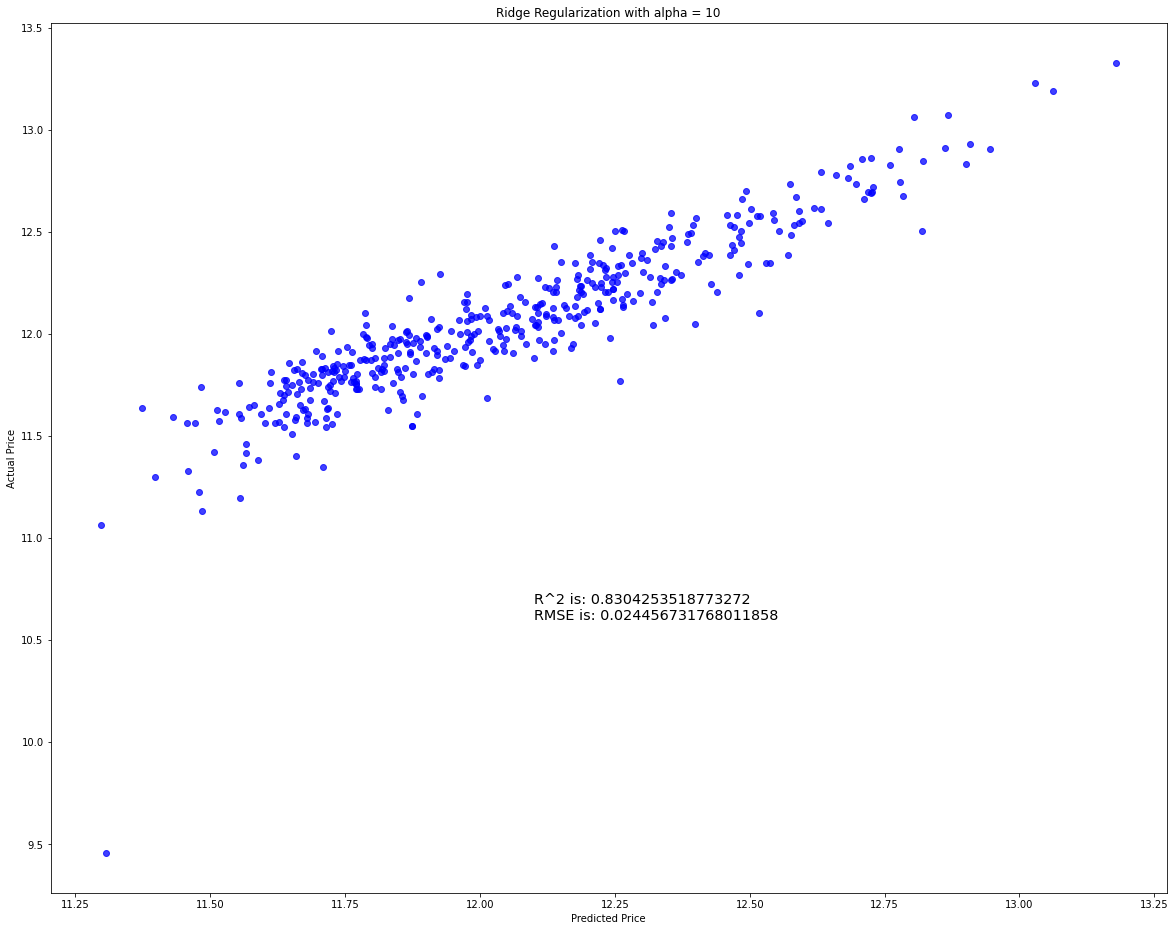

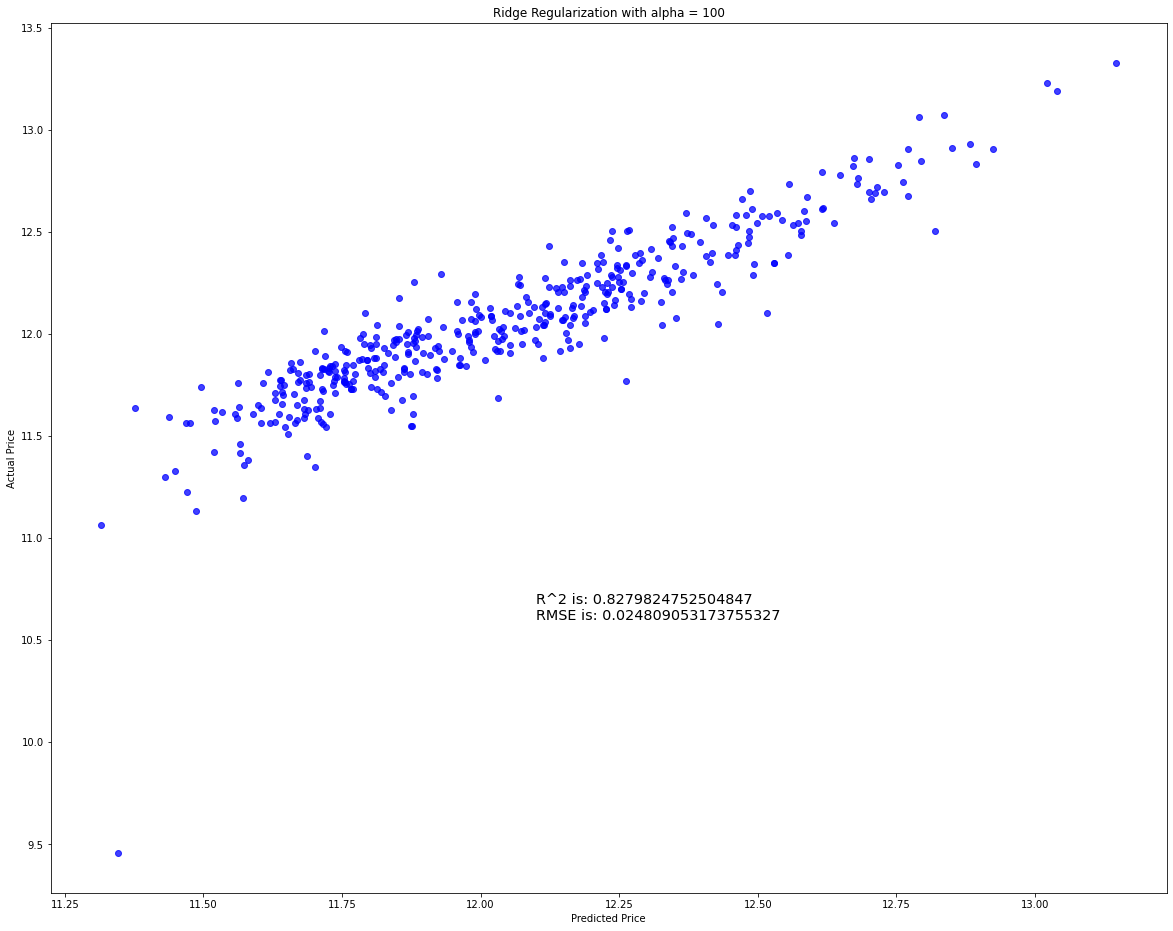

In [ ]:
for i in range(-2,3):
  alpha = 10**i 
  rm = linear_model.Ridge(alpha=alpha)
  ridge_model = rm.fit(x_train,y_train)
  preds_ridge = ridge_model.predict(x_test)

  plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
  plt.xlabel('Predicted Price')
  plt.ylabel('Actual Price')
  plt.title('Ridge Regularization with alpha = {}'.format(alpha))
  overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(x_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
  plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
  plt.show()

In [ ]:
test_d = test.select_dtypes(include=[np.number]).drop(['id'], axis=1).interpolate()

In [ ]:
predictions = model.predict(test_d)
final_predictions = np.exp(predictions)

In [ ]:
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

Original predictions are: 
 [12.73991854 11.75087649 12.05699965 12.43424213 11.76320238] 

Final predictions are: 
 [341095.76053659 126864.70625117 172301.2444691  251259.64560948
 128438.1029269 ]


In [ ]:
sub = pd.DataFrame({
    "id" : sample_sub['id'],
    "target":final_predictions
})

sub.head(5)

,id,target
0,1,341095.760537
1,2,126864.706251
2,3,172301.244469
3,4,251259.645609
4,5,128438.102927


# 제출

In [ ]:
sub.to_csv('submission.csv', index=False)
print("Done")

Done
